In [ ]:
%%writefile requirements.txt
colabcode
fastapi
uvicorn
python-multipart
pyngrok
kaggle


Writing requirements.txt


In [ ]:
!pip install -r requirements.txt

In [ ]:
# Importing some important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
pd.set_option('display.max.columns', None)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df.shape

(14247, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,14247.0,5.037131e+00,2.463112e+00,1.00,2.00,6.000,7.0000,8.00
amount,14247.0,1.118848e+05,2.805152e+05,2.39,4585.13,12869.360,121891.7050,10000000.00
oldbalanceOrg,14246.0,7.937369e+05,2.016693e+06,0.00,0.00,20415.000,138495.6450,12930418.44
newbalanceOrig,14246.0,8.107136e+05,2.059984e+06,0.00,0.00,8216.325,129417.2875,13010502.78
oldbalanceDest,14246.0,8.411336e+05,2.528174e+06,0.00,0.00,0.000,264142.6525,20937587.49
newbalanceDest,14246.0,1.147629e+06,3.151706e+06,0.00,0.00,0.000,277515.0500,25330272.63
isFraud,14246.0,5.475221e-03,7.379448e-02,0.00,0.00,0.000,0.0000,1.00
isFlaggedFraud,14246.0,0.000000e+00,0.000000e+00,0.00,0.00,0.000,0.0000,0.00


In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
len_not_fraud = len(df['isFraud'][df.isFraud == 0])
len_is_fraud = len(df['isFraud'][df.isFraud == 1])

arr = np.array([len_not_fraud, len_is_fraud])
labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total No. of Non-Fraudulent Cases: {len_not_fraud}")
print(f"Total No. Fraudulent Cases: {len_is_fraud}")

Total No. of Non-Fraudulent Cases: 14168
Total No. Fraudulent Cases: 78


There are no null values in any of the columns of the dataset.

In [ ]:
df['amount'].describe()

count    1.424700e+04
mean     1.118848e+05
std      2.805152e+05
min      2.390000e+00
25%      4.585130e+03
50%      1.286936e+04
75%      1.218917e+05
max      1.000000e+07
Name: amount, dtype: float64

In [ ]:
df.isFraud.nunique()

2

In [ ]:
# print percentage of questions where target == 1
percent = (len(df.loc[df.isFraud==1])) / (len(df.loc[df.isFraud == 0])) * 100
print(f"Percentage of Fraudulent Transanctions in the Dataset: {percent}%")

Percentage of Fraudulent Transanctions in the Dataset: 0.5505364201016375%


In [ ]:
df["type"].nunique()

5

In [ ]:
df["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [ ]:
data = df.copy(deep = True)

In [ ]:
# get all categorical columns in the dataframe
catCols = [col for col in data.columns if data[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    data[item] = lb_make.fit_transform(data[item])


In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [ ]:
# The function below will be used to evaluate different metrics of the algorithms used here.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_test, y_pred):
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred))
    print("Recall Score: ", recall_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred))
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))


    df = {'y_Actual': y_test, 'y_Predicted': y_pred}

    df1 = pd.DataFrame(df, columns = ['y_Actual','y_Predicted'])

    clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

    sns.heatmap(clf_confusion_matrix, annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

X = data.drop('isFraud', axis=1)
y = data.isFraud


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Unique predicted labels:  [0.]
Accuracy Score:  0.9946659180235823
Precision Score:  0.0
Recall Score:  0.0
F1 Score:  0.0
Confusion Matrix:  [[3543    0]
 [  19    0]]


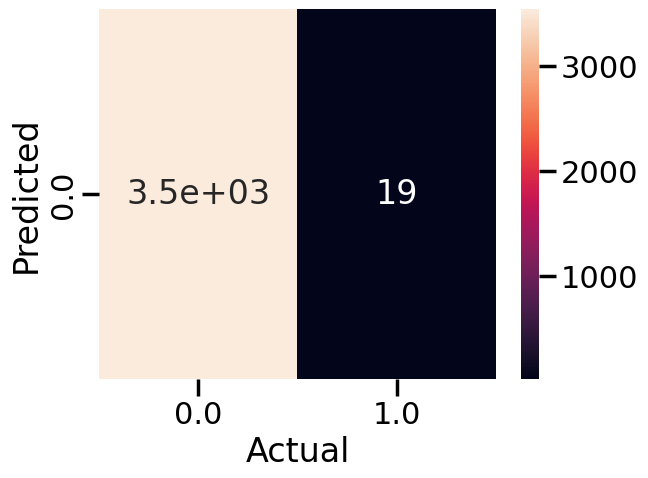

In [ ]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
evaluate_model(y_test, dummy_pred)

In [ ]:
!du -sh credit_fraud.pkl

2.5M	credit_fraud.pkl


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
%%writefile streamlit_app.py
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import json
import requests as re

st.title("Credit Card Fraud Detection Web App")

st.image("image.png")

st.write("""
## About
Credit card fraud is a form of identity theft that involves an unauthorized taking of another's credit card information for the purpose of charging purchases to the account or removing funds from it.

**This Streamlit App utilizes a Machine Learning API in order to detect fraudulent credit card  based on the following criteria: hours, type of transaction, amount, balance before and after transaction etc.**

The notebook, model and documentation(Dockerfiles, FastAPI script, Streamlit App script) are available on [GitHub.](https://github.com/Nneji123/Credit-Card-Fraud-Detection)

**Made by Group 3 Zummit Africa AI/ML Team**
**Contributors:**
- **Hilary Ifezue(Group Lead)**
- **Nneji Ifeanyi**
- **Somtochukwu Ogechi**
- **ThankGod Omieje**
""")


st.sidebar.header('User Input Features of The Transaction')

sender_name = st.text_input("Input Sender ID")
receiver_name = st.text_input("")
step = st.sidebar.slider('Number of Hours it took the Transaction to complete: ')
types = st.sidebar.selectbox("Type of Transfer Made: Enter 0 for Cash In Transaction\n 1 for Cash Out Transaction\n 2 for Debit Transaction\n 3 for Payment Transaction\n  4 for Transfer Transaction.",(0,1,2,3,4))
amount = st.sidebar.number_input("Amount in $",min_value=0, max_value=110000)
oldbalanceorg = st.sidebar.number_input('Original Balance Before Transaction was made',min_value=0, max_value=110000)
newbalanceorg= st.sidebar.number_input('New Balance After Transaction was made',min_value=0, max_value=110000)
oldbalancedest= st.sidebar.number_input('Old Balance',min_value=0, max_value=110000)
newbalancedest= st.sidebar.number_input('New Balance',min_value=0, max_value=110000)
isflaggedfraud = st.sidebar.selectbox('Specify if this was flagged as Fraud by your System: ',(0,1))

if st.button("Detection Result"):
    values = {
            'Hours': step,
                'type_of_transfer': types,
                'amount': amount,
                'old_balance_original': oldbalanceorg,
                'new_balance_original': newbalanceorg,
                'old_balance_dest': oldbalancedest,
                'new_balance_dest': newbalancedest,
                'is_flagged_fraud': isflaggedfraud}

    res = re.post(f"https://credit-fraud-ml-api.herokuapp.com/predict",json=values)
    json_str = json.dumps(res.json())
    resp = json.loads(json_str)
    st.write("The transaction that took place between and is {resp[0]")











Overwriting streamlit_app.py


In [ ]:
!streamlit run /content/streamlit_app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.49.237:8501

  Stopping...
^C


In [ ]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.49.237:8501

  Stopping...
  Stopping...
